In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from scipy import stats


In [3]:
data=pd.read_csv('statistics_sales_project_data.csv')

In [4]:
data.head()

,date,store_type,region,marketing_campaign,units_sold,revenue
0,2023-01-01,Online,Western,Yes,6,11876.03
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00
2,2023-01-03,Physical,Western,No,4,8101.97
3,2023-01-04,Physical,Coast,No,8,10928.92
4,2023-01-05,Online,Nairobi,No,9,18166.40


In [5]:
data.shape

(1200, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1200 non-null   object 
 1   store_type          1200 non-null   object 
 2   region              1200 non-null   object 
 3   marketing_campaign  1200 non-null   object 
 4   units_sold          1200 non-null   int64  
 5   revenue             1200 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 56.4+ KB


In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1200 non-null   datetime64[ns]
 1   store_type          1200 non-null   object        
 2   region              1200 non-null   object        
 3   marketing_campaign  1200 non-null   object        
 4   units_sold          1200 non-null   int64         
 5   revenue             1200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.4+ KB


## Task 1.1 – Central Tendency

In [9]:
data['month']=data['date'].dt.month

In [10]:
data.head()

,date,store_type,region,marketing_campaign,units_sold,revenue,month
0,2023-01-01,Online,Western,Yes,6,11876.03,1
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00,1
2,2023-01-03,Physical,Western,No,4,8101.97,1
3,2023-01-04,Physical,Coast,No,8,10928.92,1
4,2023-01-05,Online,Nairobi,No,9,18166.40,1


In [11]:
mean_monthly_revenue= data.groupby('month')['revenue'].mean()

In [12]:
mean_monthly_revenue

month
1     9058.379274
2     8426.665841
3     8163.805242
4     7479.152308
5     8062.061720
6     8405.007889
7     7511.176344
8     8752.610538
9     8626.410222
10    7994.553011
11    8352.832778
12    8283.794731
Name: revenue, dtype: float64

In [13]:
median_monthly_revenue= data.groupby('month')['revenue'].median()

In [14]:
region_revenue=data.groupby('region')['revenue'].sum()
print(region_revenue)

region
Central        2186660.52
Coast          1693296.13
Nairobi        1849335.21
Rift Valley    2221299.69
Western        1975777.25
Name: revenue, dtype: float64


In [15]:
median_monthly_revenue

month
1     9159.980
2     8032.770
3     8061.960
4     6654.480
5     7034.350
6     7999.585
7     6825.560
8     8226.730
9     7892.820
10    7795.230
11    7577.390
12    7896.730
Name: revenue, dtype: float64

In [16]:
mode_monthly_revenue= data.groupby('month')['revenue'].apply(lambda x : x.mode().iloc[0])

In [17]:
mode_monthly_revenue

month
1     1996.90
2      912.51
3        0.00
4        0.00
5        0.00
6     1616.87
7        0.00
8     1370.70
9        0.00
10       0.00
11    1055.66
12    1234.01
Name: revenue, dtype: float64

## Task 1.2 – Dispersion

In [18]:
revenue_range=np.ptp(data['revenue'])

In [19]:
revenue_range

np.float64(26885.87)

In [20]:
revenue_variance=data['revenue'].var(ddof=0)

In [21]:
revenue_variance

np.float64(18302805.114320833)

In [22]:
revenue_std=data['revenue'].std(ddof=0)
revenue_std

np.float64(4278.177779653486)

C:\Users\PC\AppData\Local\Temp\ipykernel_14552\2912894863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month',y='revenue',data=data,palette='viridis',showmeans=True)


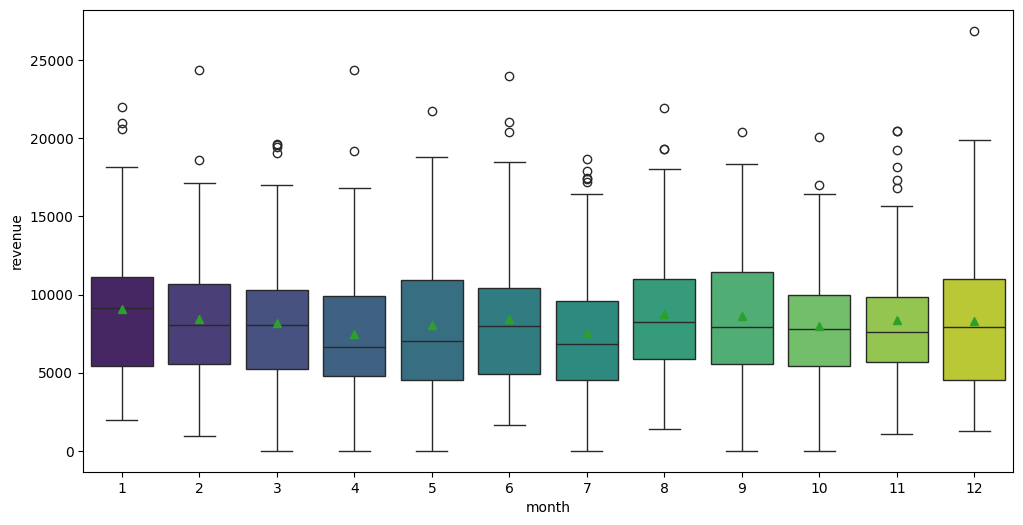

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month',y='revenue',data=data,palette='viridis',showmeans=True)
plt.show()

## Task 1.3 – Shape of Distribution


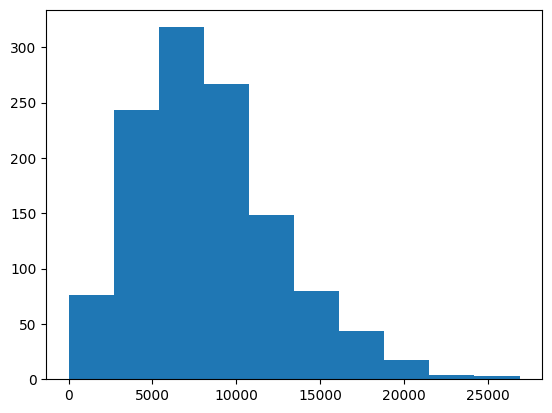

In [ ]:
plt.hist(data['revenue'])

plt.show()

In [25]:
skewness=data['revenue'].skew()
kurtosis_val=data['revenue'].kurt()
print(f'skewness value :{skewness} and kurtosis value :{kurtosis_val}')

skewness value :0.7490242110048875 and kurtosis value :0.6137388543678663


## PART 2: Data Visualization


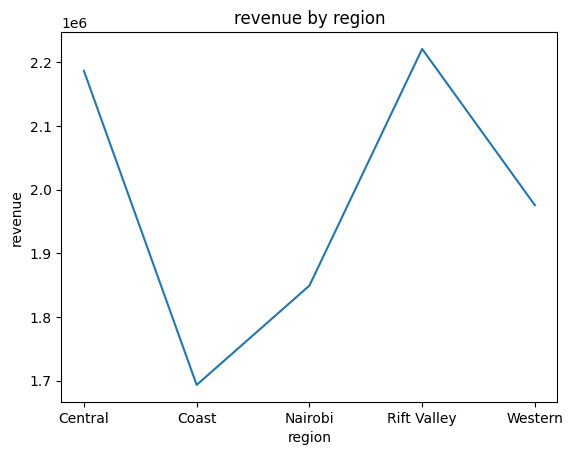

In [26]:
plt.plot(region_revenue)
plt.title('revenue by region')
plt.ylabel('revenue')
plt.xlabel('region')
plt.show()

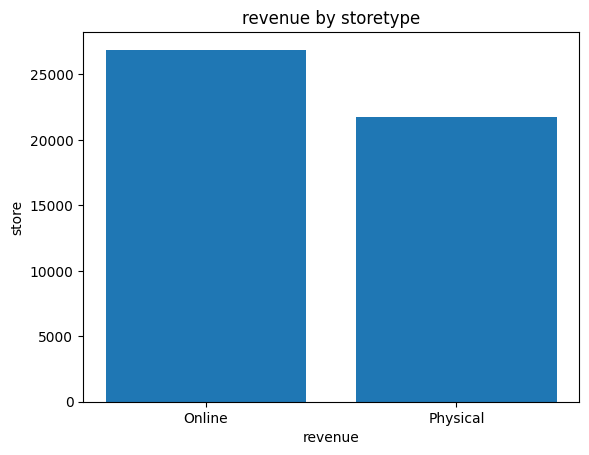

In [27]:
plt.bar(data['store_type'],data['revenue'])
plt.ylabel('store')
plt.xlabel('revenue')
plt.title('revenue by storetype')
plt.show()

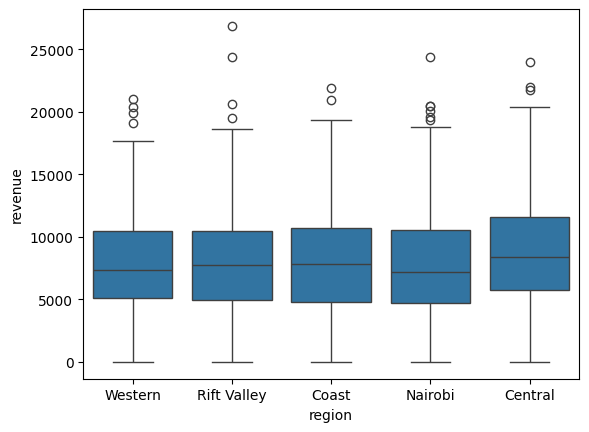

In [28]:
plt.Figure(figsize=(12,6))
sns.boxplot(x=data['region'],y=data['revenue'])
plt.show()

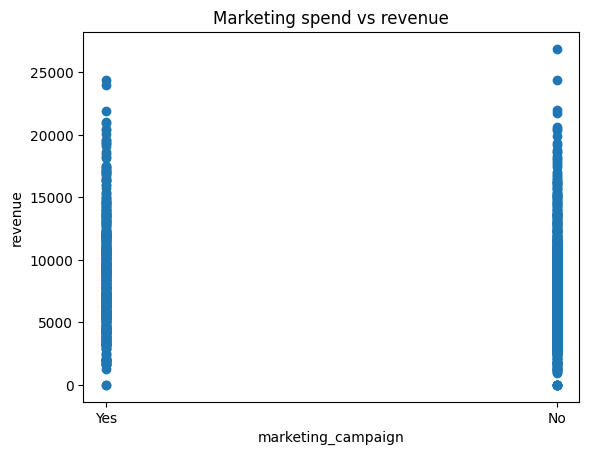

In [29]:
plt.scatter(data['marketing_campaign'],data['revenue'])
plt.ylabel('revenue')
plt.xlabel('marketing_campaign')
plt.title('Marketing spend vs revenue')
plt.show()

## Task 3.1 – Population vs Sample


In [30]:
#Population => This is entire dataset

# Sample
examp1=data.sample(frac=0.1,random_state=42)
## examp11 is a sample of the entire data set

## Task 3.2 – Sampling Bias


## Task 4.1 – Law of Large Numbers

In [31]:
sample_sizes=[10,50,100,500]
sample_means=[]

In [32]:
for n in sample_sizes:
    sample=data['revenue'].sample(n=n,random_state=42)
    sample_means.append(sample.mean())

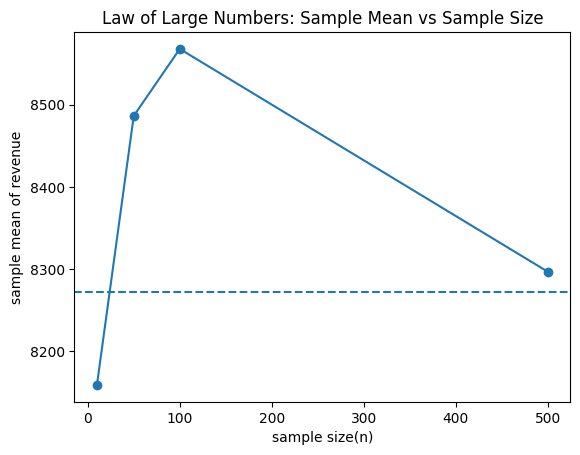

In [33]:
plt.Figure(figsize=(14,7))
plt.plot(sample_sizes,sample_means,marker='o')
plt.axhline(data['revenue'].mean(),linestyle='--')

plt.xlabel('sample size(n)')
plt.ylabel('sample mean of revenue')
plt.title('Law of Large Numbers: Sample Mean vs Sample Size')
plt.show()


## Task 4.2 – Central Limit Theorem


In [34]:
n=30
num_samples=200
samplemean_=[]

for _ in range(num_samples):
    sample=data['revenue'].sample(n=n,replace=True)
    samplemean_.append(sample.mean())

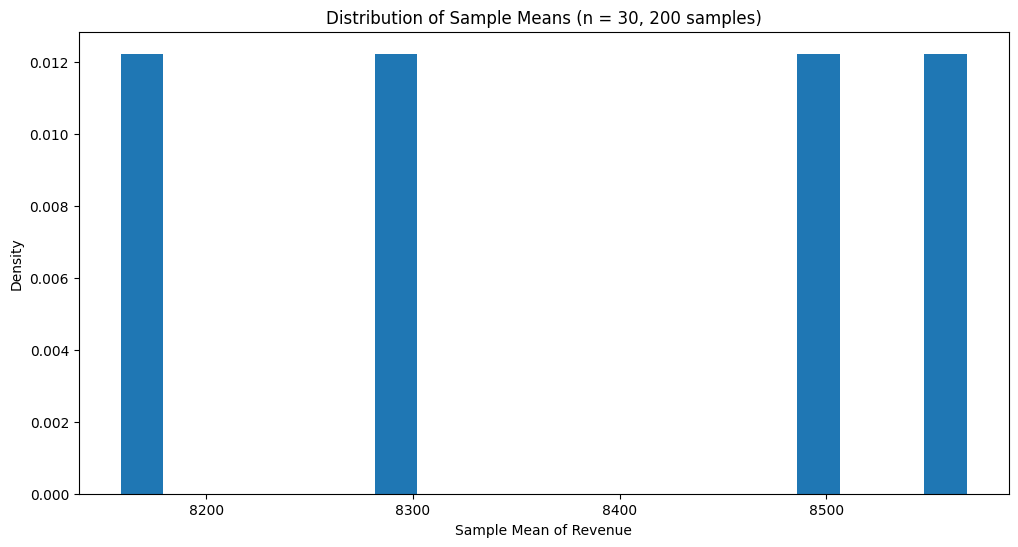

In [35]:
plt.figure(figsize=(12,6))
plt.hist(sample_means, bins=20, density=True)
plt.xlabel('Sample Mean of Revenue')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (n = 30, 200 samples)')
plt.show()

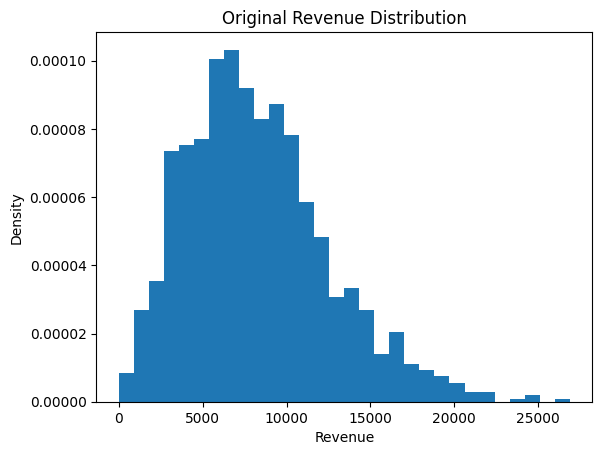

In [36]:
plt.figure()
plt.hist(data['revenue'], bins=30, density=True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.title('Original Revenue Distribution')
plt.show()

## PART 5: Hypothesis Testing (Chapter 4)


In [37]:
campaign_data =data[data['marketing_campaign']=='Yes']
no_campaign_data=data[data['marketing_campaign']=='No']

In [38]:
campaign_mean=campaign_data['revenue'].median()
print(campaign_mean)
no_campaign_mean=no_campaign_data['revenue'].median()
print(no_campaign_mean)

8590.06
7401.28


In [48]:
t_stat,p_val=stats.ttest_ind(campaign_data['revenue'],no_campaign_data['revenue'],alternative='greater')

In [45]:
print(f'p_value:{p_val} | t-statistic : {t_stat}')

p_value:5.043041819050511e-06 | t-statistic : 4.434274857534006


## PART 6: Errors and Interpretation (Chapter 5)

## PART 7: Effect Size and Power


In [50]:
campaign_std=campaign_data['revenue'].std(ddof=1)
no_campaign_std=no_campaign_data['revenue'].std(ddof=1)
n1,n2=len(campaign_data),len(no_campaign_data)

pooled_std=np.sqrt(((n1-1)*campaign_std**2+(n2-1)*no_campaign_std**2)/(n1+n2-2))
cohens_d=(campaign_mean-no_campaign_mean)/pooled_std
print(f"cohen's d: ,{cohens_d}| The effect is small")

cohen's d: ,0.2799081586070631| The effect is small


## Task 7.2 – Power Discussion
